<h1 style="font-size: 50px;">Relational Automatic Learning</h1>

<div style="width: 100%; height: 1px; background-color: black; margin-top: 20px; margin-bottom: 20px"></div>

<h3>Importando librerías</h3>

In [62]:
#Abrirlo desde jupyter (no desde sage)

#!pip install networkx
#!pip install scikit-learn

import networkx as nx
import sklearn as sk

import pandas
import numpy
import matplotlib.pyplot as plt

<h3>Variables de configuración</h3>

In [99]:
numberOfNodes = 20000 #Recomendado 20000 para reducir tiempos de ejecución

<h3>Lectura de nodos (Artists)</h3>

In [100]:
spotifyArtists = pandas.read_csv('data/nodes.csv', header=1, low_memory=False,
                          names=['spotify_id','name','followers','popularity','genres','chart_hits'])

In [101]:
print(spotifyArtists.shape)

(156421, 6)


In [102]:
# 10 primeras filas
spotifyArtists.head(10)

,spotify_id,name,followers,popularity,genres,chart_hits
0,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
1,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36,[],['de (1)']
2,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
3,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']
4,0FQMb3mVrAKlyU4H5mQOJh,Madh,26677.0,19,[],['it (2)']
5,71BhXa24Zf5zcikUb00l2N,Juice,11312.0,37,"['swedish drill', 'swedish hip hop', 'swedish ...",['se (4)']
6,3TG1RXLaEhHz5SIPMWahit,Nehuda,36252.0,31,['francoton'],['fr (1)']
7,7MFvm8pwjLdmVBZddGNiQH,VovaZiLvova,14619.0,43,"['ukrainian hip hop', 'ukrainian pop', 'ukrain...",['ua (1)']
8,5I82NM6jN4Y267iHwVeNR9,Nata Record,188.0,12,[],['do (1)']
9,5OkJ74jazRprW3kCTjfgOL,Yomi,7246.0,30,['norwegian pop rap'],['no (2)']


<h3>Lectura de aristas (Artists feats)</h3>

In [103]:
artistsFeats = pandas.read_csv('data/edges.csv', header=1, low_memory=False,
                          names=['id_0','id_1'])

In [104]:
print(artistsFeats.shape)

(300385, 2)


In [105]:
# 10 primeras filas
artistsFeats.head(10)

,id_0,id_1
0,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD
1,38jpuy3yt3QIxQ8Fn1HTeJ,4csQIMQm6vI2A2SCVDuM2z
2,6PvcxssrQ0QaJVaBWHD07l,6UCQYrcJ6wab6gnQ89OJFh
3,2R1QrQqWuw3IjoP5dXRFjt,4mk1ScvOUkuQzzCZpT6bc0
4,0k70gnDBLPirCltbTzoxuM,5FK3qokBQYxr7ZLkr8GVFn
5,1bAftSH8umNcGZ0uyV7LMg,1vqR17Iv8VFdzure1TAXEq
6,21ey6s5hEcTcVKDrF5MWby,7uMh23xWiuR7zsNkuNcm2G
7,1mYsTxnqsietFxj1OgoGbG,7snhzmuew8iLEDxMIhOU1P
8,3GBBxBdoolb0B5YizZq9bF,3yayE6rrovGcNkMManKwVf
9,2I9SLklAOG0vdMiUUMNxRl,4IprNlQiJZUUJhDl0fL2SL


<h3>Subconjunto de 20.000 nodos</h3>
</br>
<div>Nos quedamos con los 20 mil primeros nodos y las aristas, que en origen y destino, apunten a dichos nodos.</div>

<h4>Subconjunto de nodos</h4>

In [106]:
subSpotifyArtists = spotifyArtists.drop_duplicates(subset='spotify_id').head(numberOfNodes) #Elimina nodos duplicados (mismo id)

print(subSpotifyArtists.shape)
subSpotifyArtists.head(10)

(20000, 6)


,spotify_id,name,followers,popularity,genres,chart_hits
0,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
1,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36,[],['de (1)']
2,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
3,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']
4,0FQMb3mVrAKlyU4H5mQOJh,Madh,26677.0,19,[],['it (2)']
5,71BhXa24Zf5zcikUb00l2N,Juice,11312.0,37,"['swedish drill', 'swedish hip hop', 'swedish ...",['se (4)']
6,3TG1RXLaEhHz5SIPMWahit,Nehuda,36252.0,31,['francoton'],['fr (1)']
7,7MFvm8pwjLdmVBZddGNiQH,VovaZiLvova,14619.0,43,"['ukrainian hip hop', 'ukrainian pop', 'ukrain...",['ua (1)']
8,5I82NM6jN4Y267iHwVeNR9,Nata Record,188.0,12,[],['do (1)']
9,5OkJ74jazRprW3kCTjfgOL,Yomi,7246.0,30,['norwegian pop rap'],['no (2)']


<h4>Subconjunto de aristas</h4>

In [107]:
subArtistsFeat = artistsFeats[artistsFeats['id_0'].isin(subSpotifyArtists['spotify_id']) & artistsFeats['id_1'].isin(subSpotifyArtists['spotify_id'])]

print(subArtistsFeat.shape)
subArtistsFeat.head(10)

(72944, 2)


,id_0,id_1
0,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD
4,0k70gnDBLPirCltbTzoxuM,5FK3qokBQYxr7ZLkr8GVFn
5,1bAftSH8umNcGZ0uyV7LMg,1vqR17Iv8VFdzure1TAXEq
6,21ey6s5hEcTcVKDrF5MWby,7uMh23xWiuR7zsNkuNcm2G
11,4Cmzjffz7uLaESQIWIs9G5,6XvZkxVvGXWhlDFTR6Q4sj
13,0OZ5IlVdYIK1Et3nW6aTO5,6eUofOqC7jS5aPeTa1a71y
16,0IpLJsvZHA1op1pw8GAoPu,2QjS2N6sORI7H4qbf6xitS
17,2oX42qP5ineK3hrhBECLmj,6aZyMrc4doVtZyKNilOmwu
25,2cPqdH7XMvwaBJEVjheH8g,329e4yvIujISKGKz1BZZbO
26,0t6A5IoqSxQzxmMoDkS9Cv,2Z9KL8Zmqx5Sg3cd7Fldhl


<h3>Generando el grafo con NetworkX</h3>

In [108]:
artistsGraph = nx.Graph()

for index, row in subSpotifyArtists.iterrows():
    node_id = row['spotify_id']
    node_attributes = row.drop('spotify_id')
    artistsGraph.add_node(node_id, **node_attributes)

for index, row in subArtistsFeat.iterrows():
    node_id_0 = row['id_0']
    node_id_1 = row['id_1']
    artistsGraph.add_edge(node_id_0, node_id_1)

# Imprimimos la cantidad de nodos y aristas
print("Cantidad de nodos:", artistsGraph.number_of_nodes())
print("Cantidad de aristas:", artistsGraph.number_of_edges())

Cantidad de nodos: 20000
Cantidad de aristas: 72944


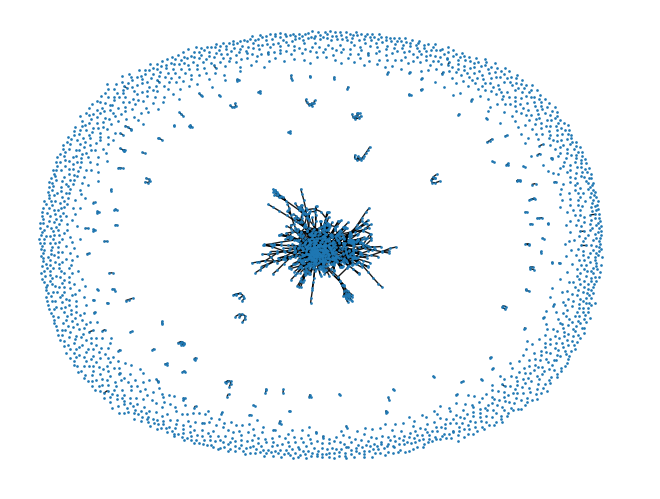

In [98]:
# Pintar el grafo completo (si hay muchos nodos tarda bastante. Muchos = mas de 3000 nodos) 
if(numberOfNodes<=3000): #Si hay más de 3000 no se visualiza porque tarda demasiado
    nx.draw(artistsGraph, node_size=1, alpha=0.9) 

    plt.show()

<h4>Añadiendo la centralidad a la información de los nodos del grafo</h4>

In [109]:
# Calcular la centralidad de grado todos nodos
degree_centrality = nx.degree_centrality(artistsGraph)

# Crear una lista de tuplas con los valores de centralidad
centrality_values = [(node, centrality) for node, centrality in degree_centrality.items()]

# Crear un DataFrame con los valores de centralidad
centrality_df = pandas.DataFrame(centrality_values, columns=['spotify_id', 'centrality'])

# Unir el DataFrame de centralidad con el DataFrame subSpotifyArtists
subSpotifyArtists = subSpotifyArtists.merge(centrality_df, on='spotify_id')

# Imprimir el DataFrame con la nueva columna
print(subSpotifyArtists[['spotify_id', 'centrality']].head(10))



               spotify_id  centrality
0  4lDiJcOJ2GLCK6p9q5BgfK     0.00215
1  652XIvIBNGg3C0KIGEJWit     0.00025
2  3dXC1YPbnQPsfHPVkm1ipj     0.00025
3  74terC9ol9zMo8rfzhSOiG     0.00005
4  0FQMb3mVrAKlyU4H5mQOJh     0.00010
5  71BhXa24Zf5zcikUb00l2N     0.00015
6  3TG1RXLaEhHz5SIPMWahit     0.00005
7  7MFvm8pwjLdmVBZddGNiQH     0.00015
8  5I82NM6jN4Y267iHwVeNR9     0.00005
9  5OkJ74jazRprW3kCTjfgOL     0.00020


<h4>Añadiendo el coeficiente de clustering a la información de los nodos del grafo</h4>

In [110]:
# Calcular el coeficiente de clustering de los nodos
clustering_coefficient = nx.clustering(artistsGraph)

# Crear una lista de tuplas con los valores de coeficiente de clustering
clustering_values = [(node, coefficient) for node, coefficient in clustering_coefficient.items()]

# Crear un DataFrame con los valores de coeficiente de clustering
clustering_df = pandas.DataFrame(clustering_values, columns=['spotify_id', 'clustering'])

# Unir el DataFrame de coeficiente de clustering con el DataFrame subSpotifyArtists
subSpotifyArtists = subSpotifyArtists.merge(clustering_df, on='spotify_id')

# Imprimir el DataFrame con las columnas 'spotify_id' y 'clustering'
print(subSpotifyArtists[['spotify_id', 'centrality', 'clustering']].head(10))


               spotify_id  centrality  clustering
0  4lDiJcOJ2GLCK6p9q5BgfK     0.00215    0.131783
1  652XIvIBNGg3C0KIGEJWit     0.00025    0.200000
2  3dXC1YPbnQPsfHPVkm1ipj     0.00025    0.500000
3  74terC9ol9zMo8rfzhSOiG     0.00005    0.000000
4  0FQMb3mVrAKlyU4H5mQOJh     0.00010    1.000000
5  71BhXa24Zf5zcikUb00l2N     0.00015    1.000000
6  3TG1RXLaEhHz5SIPMWahit     0.00005    0.000000
7  7MFvm8pwjLdmVBZddGNiQH     0.00015    0.000000
8  5I82NM6jN4Y267iHwVeNR9     0.00005    0.000000
9  5OkJ74jazRprW3kCTjfgOL     0.00020    0.000000


<h4>Añadiendo la comunidad a la información de los nodos del grafo</h4>

In [111]:
# Detectar comunidades en el grafo utilizando el algoritmo de Label Propagation
communities = nx.algorithms.community.label_propagation.label_propagation_communities(artistsGraph)

# Crear un diccionario para mapear cada nodo a su número de comunidad
node_community_map = {}
for i, community in enumerate(communities):
    for node in community:
        node_community_map[node] = i + 1

# Agregar la columna 'community' al DataFrame subSpotifyArtists
subSpotifyArtists['community'] = subSpotifyArtists['spotify_id'].map(node_community_map)

# Imprimir el DataFrame con la nueva columna 'community'
print(subSpotifyArtists[['spotify_id', 'centrality', 'clustering', 'community']].head(10))


               spotify_id  centrality  clustering  community
0  4lDiJcOJ2GLCK6p9q5BgfK     0.00215    0.131783          1
1  652XIvIBNGg3C0KIGEJWit     0.00025    0.200000          1
2  3dXC1YPbnQPsfHPVkm1ipj     0.00025    0.500000          2
3  74terC9ol9zMo8rfzhSOiG     0.00005    0.000000          3
4  0FQMb3mVrAKlyU4H5mQOJh     0.00010    1.000000          4
5  71BhXa24Zf5zcikUb00l2N     0.00015    1.000000          5
6  3TG1RXLaEhHz5SIPMWahit     0.00005    0.000000          2
7  7MFvm8pwjLdmVBZddGNiQH     0.00015    0.000000          6
8  5I82NM6jN4Y267iHwVeNR9     0.00005    0.000000          7
9  5OkJ74jazRprW3kCTjfgOL     0.00020    0.000000          8
